<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
# импортируем библиотеку pandas и открываем файл
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#изучаем данные
data= pd.read_csv('C:/Users/Дима/real_estate_data.csv', sep='\t')
data.info()
display(data.head(5))
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

После открытия файла было обнаружено - 23699 записей. типы данных:bool(2), float64(14), int64(3), object(3). Во многих столбцах таблицы имеются пропуски связанные либо с не до конца заполненными дананными клиентами либо с ошибками привыгрузке данных.


## Предобработка данных

In [3]:
#проверка пропущенных значений:
print(data.isna().sum())
print()
print()
#вставили пропущенные значения
data = data.fillna(0)
print(data.isna().sum())
print()


data = data.astype({'last_price': int, 'floors_total': int, 'balcony': int, 'airports_nearest': int, 
                    'cityCenters_nearest': int, 'parks_around3000': int, 'parks_nearest': int, 'ponds_around3000': int, 
                    'ponds_nearest': int, 'days_exposition': int})
data.dtypes
#заполняем нуевые значения высоты потолка средним значением
data.loc[(data['ceiling_height'] == 0.00),'ceiling_height'] = 2.5
# проверяем пропуски в столбце жилая площадь по по количеству комнат
print(data[data['living_area'] == 0.0]['rooms'].value_counts())
print()
#рассчитываем среднюю жилую площадь исходя их количества комнат в квартире
print('Средняя жилая площадь 1 к кв:', data[(data['living_area'] != 0.0) & (data['rooms'] == 1)]['living_area'].median())
print('Средняя жилая площадь 2 к кв:', data[(data['living_area'] != 0.0) & (data['rooms'] == 2)]['living_area'].median())
print('Средняя жилая площадь 3 к кв:', data[(data['living_area'] != 0.0) & (data['rooms'] == 3)]['living_area'].median())
print('Средняя жилая площадь 4 к кв:', data[(data['living_area'] != 0.0) & (data['rooms'] == 4)]['living_area'].median())
print('Средняя жилая площадь 5 к кв:', data[(data['living_area'] != 0.0) & (data['rooms'] == 5)]['living_area'].median())
print('Средняя жилая площадь 6 к кв:', data[(data['living_area'] != 0.0) & (data['rooms'] == 6)]['living_area'].median())
print('Средняя жилая площадь 7 к кв:', data[(data['living_area'] != 0.0) & (data['rooms'] == 7)]['living_area'].median())
print('Средняя жилая площадь 8 к кв:', data[(data['living_area'] != 0.0) & (data['rooms'] == 8)]['living_area'].median())
print('Средняя жилая площадь 9 к кв:', data[(data['living_area'] != 0.0) & (data['rooms'] == 9)]['living_area'].median())
print()
#заполняем средние значения жилой площади исходя из количества комнат в квартире
data.loc[(data['living_area'] == 0.00) & (data['rooms'] == 1),'living_area'] = 17.9
data.loc[(data['living_area'] == 0.00) & (data['rooms'] == 2),'living_area'] = 31.7
data.loc[(data['living_area'] == 0.00) & (data['rooms'] == 3),'living_area'] = 47.4
data.loc[(data['living_area'] == 0.00) & (data['rooms'] == 4),'living_area'] = 67
data.loc[(data['living_area'] == 0.00) & (data['rooms'] == 5),'living_area'] = 100
data.loc[(data['living_area'] == 0.00) & (data['rooms'] == 6),'living_area'] = 131
data.loc[(data['living_area'] == 0.00) & (data['rooms'] == 7),'living_area'] = 163.5
data.loc[(data['living_area'] == 0.00) & (data['rooms'] == 8),'living_area'] = 168.7
data.loc[(data['living_area'] == 0.00) & (data['rooms'] == 9),'living_area'] = 190.2
print()
#перепроверяем пропуски в столбце жилая площадь по по количеству комнат
print(data[data['living_area'] == 0.0]['rooms'].value_counts())


#удалил строки в которых нет возможности восстановить данные жилой пощали и пощадь кухни

data = data.drop(data[(data['living_area'] == 0.0) & (data['rooms'] == 0)].index)
#проверяем удалились ли все ненужныестроки
print(data[(data['living_area'] == 0.0) & (data['rooms'] == 0)]['living_area'].count())
print()
#находим все пустые значения в столбце 'kitchen_area'
print(data[data['kitchen_area']==0]['rooms'].count())
print()

#заполняем пустые знаения в с столбце 'kitchen_area' исходя из объяснений в выводе:
data.loc[(data['kitchen_area'] == 0.00),'kitchen_area'] = data['total_area'] - data['living_area'] - 8.5
print()
display(data.head(5))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,0,...,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,0
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.50,11,18.6,1,0,...,11.0,2,посёлок Шушары,12817,18603,0,0,0,0,81
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.50,5,34.3,4,0,...,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.50,14,47.4,9,0,...,103.1,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,0,...,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121


## Вывод

Исходя из данных по пропускам можно предположить, что:
 - высота потолков не является преимуществом припродаже и соответсвенно имеет значения от 2,50м до 2,70м, заполним нулевые значения - 2,50м
 - отсутсвие значений о количестве этажей в доме говорит о том,что возможно это: цокольный этаж,первый этаж или одноэтажный дом
 - в столбце 'kitchen_area' пропуски говорт о том, что либо клиенты не указали случайно площадь, липо это квартира-студия. Чтобы проводить в дальнешем анализ, необходимо запонить все нулевые значения. их - 2264. Предположим что ванна и туалет занимают - 4.5м2 и коридор - 4м2. Соответственно для расчета площади кухни - мы от общей площади отнимаем:  жилую, ванну с туалетом и корридор.
 - в столбце 'balcony' пропуски говорят о том, что скорее всего балконы отсутствуют
 - в столбце 'locality_name' пропуски говорят о том, что скорее всего можно предположить что это Санкт-Петербург
 - в столбце 'airports_nearest' пропуски говорят о том, что недвижимость на ходится в области
 - в столбце 'cityCenters_nearest' пропуски говорят о том, что недвижимость  предположительно находится на окраине города
 - в столбцах 'parks_around3000','parks_nearest','ponds_around3000', 'ponds_nearest'  пропуки говорят, что скорее всего по близости парки отсутствуют  или же эту информацию не указали
 - в столбце 'days_exposition' пропуски говорят о том, что скорее всего объявления только опубликовали
Изменил тип данных на целочисленный в столбцах: 'last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', тк значения количества этажей не может быть не целым, а расстояние нет смысла исмерять не целыми метрами. 
Обнаружил 14 сток где количество комнат, жилая площадь и пощадь кухни равны 0. Удалил их тк значения жилой площади и кухни не как не востановить и они ни как не повлияют на дальнейшую обработку данных


<div class="alert alert-success">
<font size="5"<b>Комментарий ревьюера</b> </font>
    
**Успех**

Тут выводы подробные, молодец
    
</div>

## Расчёты и добавление результатов в таблицу

In [6]:
#вычисляем и добавляем в датасет стоимость 1 м2
data['price_per_metr'] = data['last_price'] / data['total_area']
#чтобы избавиться от знаков после запятой - меняием тип данных на целочисленный
data = data.astype({'price_per_metr': int})
print()


def range_floor(data):
    if data['floor'] == 1:
        return 'первый'
    if (data['floor'] == data['floors_total']) & (data['floors_total'] !=1):
        return 'последний'
    return 'другой'
 
data['range_floor'] = data.apply(range_floor, axis=1)
print()
data['living_area_ratio_total'] = data['living_area'] / data['total_area']
data['kitchen_ratio_total'] = data['kitchen_area'] / data['total_area']
data['last_price'] = data['last_price'] / 1000000 

display(data.head(5))



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,range_floor,living_area_ratio_total,kitchen_ratio_total,weekday,month,year
0,20,0.000013,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,2,755,0,0,другой,0.472222,0.231481,Thursday,March,2019
1,7,0.000003,40.4,2018-12-04,1,2.50,11,18.6,1,0,...,0,0,81,0,первый,0.460396,0.272277,Tuesday,December,2018
2,10,0.000005,56.0,2015-08-20,2,2.50,5,34.3,4,0,...,2,574,558,0,другой,0.612500,0.148214,Thursday,August,2015
3,0,0.000065,159.0,2015-07-24,3,2.50,14,47.4,9,0,...,3,234,424,0,другой,0.298113,0.648428,Friday,July,2015
4,2,0.000010,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,1,48,121,0,другой,0.320000,0.410000,Tuesday,June,2018


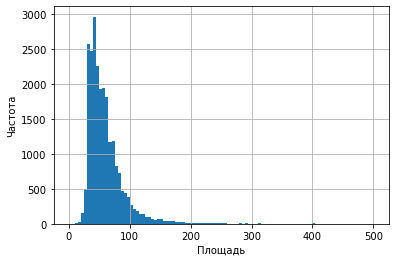

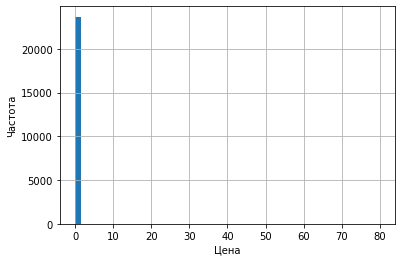

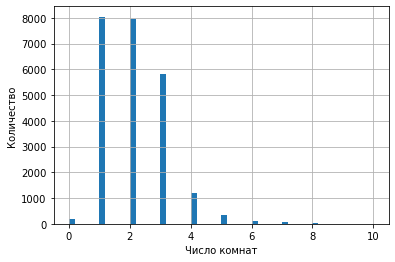

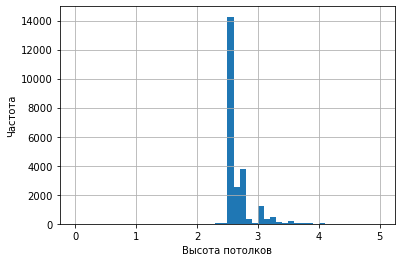

In [14]:
import matplotlib.pyplot as plt
#гистограммы:площадь, цена, число комнат, высота потолков

data['total_area'].plot(x='area', y='meaning', kind='hist',grid=True, bins=100, range=(0,500))
plt.xlabel('Площадь')
plt.ylabel('Частота')
plt.show()

data['last_price'].plot(x='price', y='meaning', kind='hist',grid=True, bins=50, range=(0, 80))
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

data['rooms'].plot(x='rooms', y='quantity', kind='hist',grid=True, bins=50, range=(0, 10))
plt.xlabel('Число комнат')
plt.ylabel('Количество')
plt.show()

data['ceiling_height'].plot(x='high', y='meaning', kind='hist',grid=True, bins=50, range=(0, 5))
plt.xlabel('Высота потолков')
plt.ylabel('Частота')
plt.show()


In [5]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['weekday'] = data['first_day_exposition'].dt.strftime('%A')
data['month'] = data['first_day_exposition'].dt.strftime('%B')
data['year'] = data['first_day_exposition'].dt.year
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,range_floor,living_area_ratio_total,kitchen_ratio_total,weekday,month,year
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,2,755,0,120370,другой,0.472222,0.231481,Thursday,March,2019
1,7,3.350,40.4,2018-12-04,1,2.50,11,18.6,1,0,...,0,0,81,82920,первый,0.460396,0.272277,Tuesday,December,2018
2,10,5.196,56.0,2015-08-20,2,2.50,5,34.3,4,0,...,2,574,558,92785,другой,0.612500,0.148214,Thursday,August,2015
3,0,64.900,159.0,2015-07-24,3,2.50,14,47.4,9,0,...,3,234,424,408176,другой,0.298113,0.648428,Friday,July,2015
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,1,48,121,100000,другой,0.320000,0.410000,Tuesday,June,2018


## Вывод

Произведен расчет стоимости 1 квадратного метра исходя их данных таблицы

Уменьшили цену в миллион раз для простоты вывода нагистограмму

На гистограмме площади квартиры видно что после 250 м2 - можно считать выбросами и не учитывать в дальнейшем анализе

на гистограмме цены продажи все что близко к 0 и  больше 30млн - можно считать выбросами

На гистограмме отображающей количество комнат можно отбросить значени которые находятся у 0 

На гистограмме высоты потолков видно что в основном потолки высотойот 2.5 - 2.7м . Потолки выше 3.5м мы исключаем,тк в жилых домах поковвыше 3.5м неможет быть

Построены и выведены гистограммы по площади, стоимости продажи, количества комнат, высоте потолков. 

In [6]:
data['total_area'].quantile(0.99)

197.03199999999998

Получается что 99% квартир площадью не больше 167 м кв

In [7]:
data['last_price'].quantile(0.99)

36.0

Цена 99% квартир не превышает 27 млн

In [8]:
 data['ceiling_height'].quantile(0.99)                      

3.6

в 99% квартир потолки не выше 3.4 м

## Исследовательский анализ данных

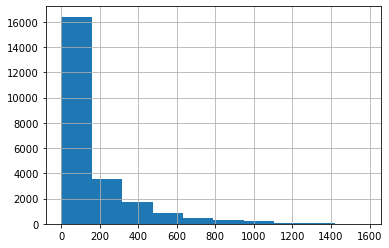

Среднее время продажи: 157 дней
Медианное время продажи: 74 дней


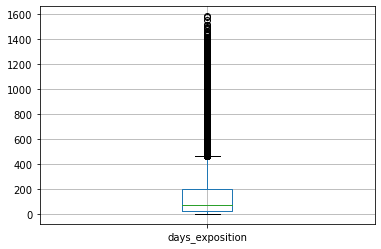

In [9]:
#строим гистограмму по времени продажи недвижимости
data['days_exposition'].hist(bins=10)
plt.show()
#вычисляем среднее и медианное времени продажи
print("Среднее время продажи: {:.0f} дней" .format(data['days_exposition'].mean()))
print('Медианное время продажи: {:.0f} дней' .format(data['days_exposition'].median()))
data.boxplot(column=['days_exposition'])
plt.show()

print()

In [10]:
data['days_exposition'].describe()

count    23685.000000
mean       156.664978
std        213.592265
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

по построенному боксплоту видно что всё что чвыше 430 дней - выбросы и их не стоит учитывать


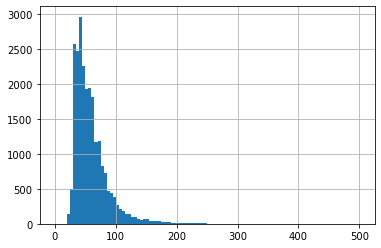

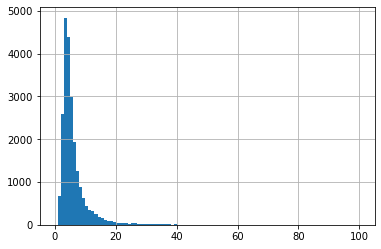

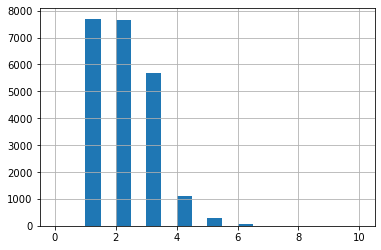

In [11]:
# делаем срезы и выводим гистограммы
data = data.sort_values(by=['total_area', 'last_price', 'rooms', 'ceiling_height'])
data =data.query('21 <= total_area < 250')
data['total_area'].hist(bins=100, range=(0,500))
plt.show()

data =data.query('1.5 < last_price < 40')
data['last_price'].hist(bins=100, range=(0,100))
plt.show()
data['rooms'].describe()
data = data.query('1<= rooms <= 6')
data['rooms'].hist(bins=20, range=(0,10))
plt.show()
data=data.query('2.5 < ceiling_height <3.5')

Исходя из ранее предпоогаемых значенийделаем срезы по площади, цене, комнатам и высоте потоков.

Соответственно предположил,что минимальная площадь студии не может быть меньше 21м2, так же максимально возможную площадь ограничили 250м2.

По цене срез делал изходя из того, чтосамая маленькая квартира не может стоить меньше 1,5млн руб, а максимальна цена - 40 млнруб.

в среднем по рынку квартиры не встречаются более 6 комнат. все остальное комуналки и они редко продаются целеком.
Предпологаю, то дома с потолками ниже 2,55м и 3,5м не строят.


In [12]:
# строим сводную таблицу соотношения цены к площади
price_and_metr = data.pivot_table(index=['last_price','total_area'], values= 'price_per_metr').sort_values(by='price_per_metr')
display(price_and_metr)
#рассчитываем коэффициент корреляции
print(data['last_price'].corr(data['total_area']))

,,price_per_metr
last_price,total_area,
3.200,190.0,16842
1.600,92.0,17391
1.900,84.6,22458
1.600,67.1,23845
1.700,70.0,24285
...,...,...
36.000,80.0,450000
35.000,74.8,467914
39.744,72.0,552000


0.7835553842571067


Коэф. коррелции показывает, что цена квартиры сильно зависит от пощади квартиры

In [13]:
price_per_rooms = data.pivot_table(index='rooms', values= 'last_price',aggfunc = 'mean')
display(price_per_rooms)
print(data['rooms'].corr(data['last_price']))

,last_price
rooms,
1,4.200366
2,6.289871
3,8.617084
4,11.825336
5,14.730000
6,17.182824


0.5123878035070919


Коэф. коррелции показывает, чтоколичество комнат прямо влияет на цену продажи

In [14]:
price_per_floor = data.pivot_table(index='range_floor', values= 'last_price')
display(price_per_floor)


,last_price
range_floor,
другой,6.882583
первый,5.313070
последний,6.867588


Исходя из данных можно сделать вывод, что квартиры на первом этаже стот дешевле

In [15]:
price_per_cityCenters = data.pivot_table(index='cityCenters_nearest', values= 'last_price')
display(price_per_cityCenters)

print(data['cityCenters_nearest'].corr(data['last_price']))

,last_price
cityCenters_nearest,
0,3.656581
181,31.099000
287,9.590000
318,32.500000
329,7.200000
...,...
54926,8.400000
61495,3.200000
62706,3.600000


-0.08799491946710682


In [16]:
print(data['days_exposition'].corr(data['last_price']))

0.053097282554207


Коэф. коррелции показывае,что дата размещения объявления о продаже практически не влияет на цену

<AxesSubplot:xlabel='weekday'>

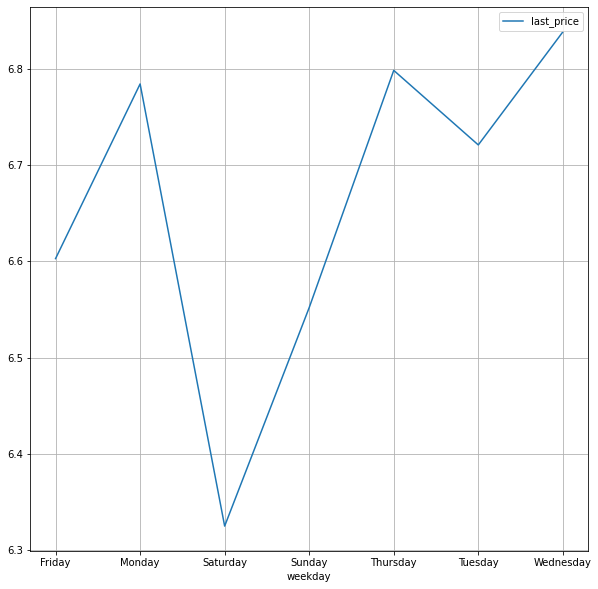

In [17]:

weekday_celling = data.pivot_table(index = 'weekday',values= 'last_price')
weekday_celling.plot( y='last_price', style='-', grid=True, figsize=(10,10))

 Исходя из графика видно, что самые дорогие объявления публикуются в будни: понедельник, вторник, четверг, среда. Самые дешевые объявлени публикуются в выходные

<body style=»background-color: #55D52B»>
</body>

<AxesSubplot:xlabel='month'>

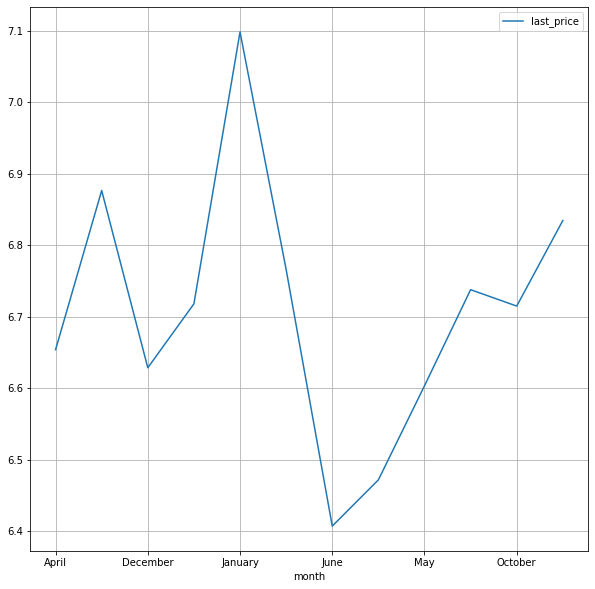

In [18]:
month_celling = data.pivot_table(index = 'month',values= 'last_price')
month_celling.plot( y='last_price', style='-', grid=True, figsize=(10,10))

 <font color='green'>Исходя из графика видно, что цены летом падают и а в остальное время в целом растут</font> 

<AxesSubplot:xlabel='year'>

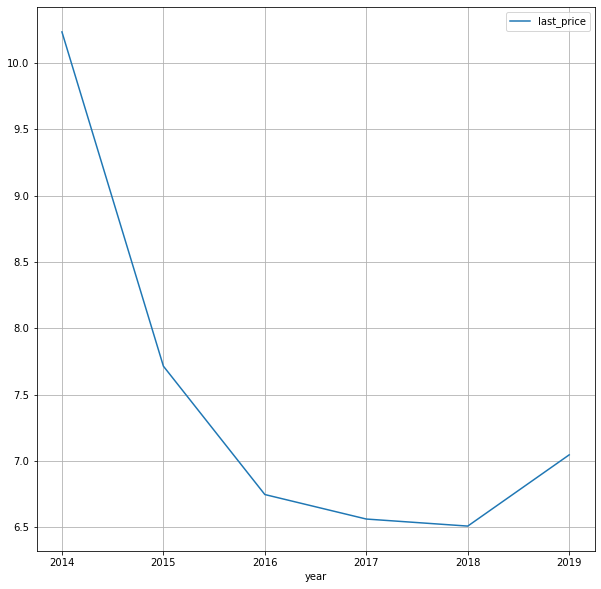

In [19]:
year_celling = data.pivot_table(index = 'year',values= 'last_price')
year_celling.plot( y='last_price', style='-', grid=True, figsize=(10,10))

Исходя из графика видно, что с 14 года по 18 - цены снижались и только с 18 года снова пошли в рост

In [20]:
data['month'] = data['first_day_exposition'].dt.month

In [21]:

#max_and_low_price = data.groupby('locality_name')['price_per_metr']
max_and_low_price = data.pivot_table(index='locality_name', values='last_price').sort_values(by= 'last_price', ascending=False)
max_and_low_price

,last_price
locality_name,
деревня Бор,20.295200
посёлок Репино,14.522472
посёлок Александровская,13.700000
0,8.180159
Санкт-Петербург,7.645859
...,...
поселок Барышево,1.600000
деревня Суоранда,1.600000
посёлок Стеклянный,1.600000


Исходя из таблицы больше всего объявлений в Санкт-Петербурге. Самая высокая стоимость недвижимости - в деревне Бор, самая дешевая недвижимость - в поселке Пригорный и пгт Кузнечное.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_metr,range_floor,living_area_ratio_total,kitchen_ratio_total,weekday,month,year,distance_to_center
114,5,4.000,21.4,2019-02-07,1,2.90,8,8.3,7,0,...,286,0,186915,другой,0.387850,0.294393,Thursday,2,2019,6.0
8894,3,2.099,23.0,2018-09-25,1,2.70,16,17.9,10,0,...,457,37,91260,другой,0.778261,-0.147826,Tuesday,9,2018,23.0
23673,9,3.100,23.0,2018-03-19,1,2.80,9,12.6,1,0,...,442,41,134782,первый,0.547826,0.217391,Monday,3,2018,12.0
7829,9,3.390,23.0,2019-02-21,1,2.54,6,10.0,1,0,...,631,60,147391,первый,0.434783,0.304348,Thursday,2,2019,7.0
12323,6,3.790,23.3,2019-04-04,1,2.70,25,18.4,13,0,...,1159,9,162660,другой,0.789700,-0.154506,Thursday,4,2019,15.0


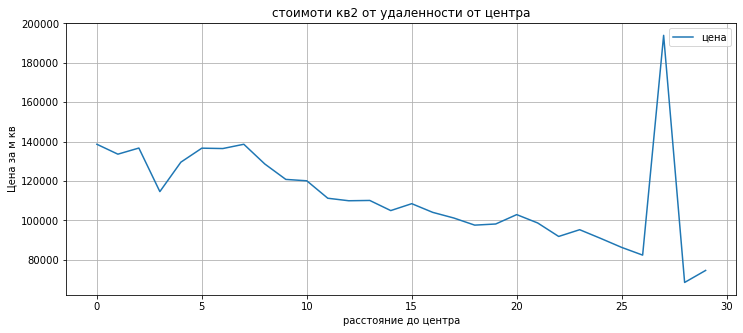

In [37]:
#Добавляем новый столбец с расстоянием до центра в км
data['distance_to_center'] = (data['cityCenters_nearest']/1000).round()
spb = data.query('locality_name == "Санкт-Петербург"')

display(spb.head(5))
#строим сводную таблицу и график зависимости стоимоти кв2 от удаленности от центра
center_round = spb.pivot_table(index = 'distance_to_center',values= 'price_per_metr').sort_values(by= 'distance_to_center').round()


fig, ax = plt.subplots()
ax.plot(center_round, label = 'цена')
ax.legend()
plt.title('стоимоти кв2 от удаленности от центра')
plt.xlabel('расстояние до центра')
plt.ylabel('Цена за м кв')
fig.set_figwidth(12)
fig.set_figheight(5)
plt.grid()
plt.show()


 Изходя из графика - видно что в целом чем дальше квартира от центра тем дешевле она стоит
 Можно предположить что центральная зона - приблизительно 10 км

In [23]:
center_spb = spb.query('distance_to_center < 11')
center_spb_round = center_spb.pivot_table(index='distance_to_center', values=['total_area', 'last_price', 'rooms', 
                                                                              'ceiling_height'], aggfunc = ['mean','median']).sort_values(by= 'distance_to_center').round()
center_spb_round

mean                                     median  \
                   ceiling_height last_price rooms total_area ceiling_height   
distance_to_center                                                             
0.0                           3.0       12.0   3.0       80.0            3.0   
1.0                           3.0       11.0   3.0       88.0            3.0   
2.0                           3.0       12.0   3.0       89.0            3.0   
3.0                           3.0       10.0   3.0       86.0            3.0   
4.0                           3.0       11.0   3.0       89.0            3.0   
5.0                           3.0       11.0   3.0       84.0            3.0   
6.0                           3.0       11.0   2.0       76.0            3.0   
7.0                           3.0       11.0   2.0       73.0            3.0   
8.0                           3.0       10.0   2.0       77.0            3.0   
9.0                           3.0        8.0   2.0       65.0            3.0   
10.0                          3.0        7.0   2.0       61.0            3.0   

                                                
                   last_price rooms total_area  
distance_to_center                              
0.0                       7.0     2       68.0  
1.0                      10.0     3       81.0  
2.0                      10.0     3       83.0  
3.0                       8.0     3       79.0  
4.0                       9.0     3       82.0  
5.0                       9.0     3       75.0  
6.0                       8.0     2       72.0  
7.0                       7.0     2       65.0  
8.0                       9.0     2       70.0  
9.0                       6.0     2       60.0  
10.0                      6.0     2       53.0

Сводная таблица по дефолту агреширует по среднему значению, если в параметре aggfunc - ни чего не указывать. 

Если задать параметр 'median', то соответственно будет агрегироватьс по медианным значениям

In [24]:
#выделим сегмент города за пределами центра:
outside_the_city_spb = spb.query('distance_to_center > 11')

In [25]:
outside_the_city_spb_round = outside_the_city_spb.pivot_table(index='distance_to_center', values=['total_area', 'last_price', 'rooms', 
                                                                              'ceiling_height'], aggfunc = ['mean','median']).sort_values(by= 'distance_to_center').round()
outside_the_city_spb_round

mean                                     median  \
                   ceiling_height last_price rooms total_area ceiling_height   
distance_to_center                                                             
12.0                          3.0        6.0   2.0       57.0            3.0   
13.0                          3.0        7.0   2.0       60.0            3.0   
14.0                          3.0        6.0   2.0       56.0            3.0   
15.0                          3.0        6.0   2.0       59.0            3.0   
16.0                          3.0        6.0   2.0       56.0            3.0   
17.0                          3.0        6.0   2.0       58.0            3.0   
18.0                          3.0        5.0   2.0       58.0            3.0   
19.0                          3.0        5.0   2.0       54.0            3.0   
20.0                          3.0        7.0   2.0       65.0            3.0   
21.0                          3.0        6.0   2.0       60.0            3.0   
22.0                          3.0        6.0   2.0       62.0            3.0   
23.0                          3.0        5.0   2.0       57.0            3.0   
24.0                          3.0        5.0   2.0       52.0            3.0   
25.0                          3.0        4.0   2.0       51.0            3.0   
26.0                          3.0        4.0   2.0       53.0            3.0   
27.0                          3.0       14.0   2.0       74.0            3.0   
28.0                          3.0        8.0   3.0      111.0            3.0   
29.0                          3.0        4.0   2.0       47.0            3.0   

                                                
                   last_price rooms total_area  
distance_to_center                              
12.0                      5.0   2.0       52.0  
13.0                      6.0   2.0       54.0  
14.0                      5.0   2.0       50.0  
15.0                      5.0   2.0       53.0  
16.0                      5.0   2.0       51.0  
17.0                      5.0   2.0       53.0  
18.0                      5.0   2.0       52.0  
19.0                      4.0   2.0       52.0  
20.0                      6.0   2.0       68.0  
21.0                      6.0   2.0       58.0  
22.0                      5.0   2.0       56.0  
23.0                      5.0   2.0       52.0  
24.0                      5.0   2.0       56.0  
25.0                      3.0   1.0       37.0  
26.0                      4.0   1.0       44.0  
27.0                     14.0   2.0       74.0  
28.0                      8.0   3.0      111.0  
29.0                      4.0   2.0       47.0

Исходя из сводных таблиц центра и за пределами центра города, видно что чем дальше от центра тем квартиры дешевле и меньше площадь квартир.


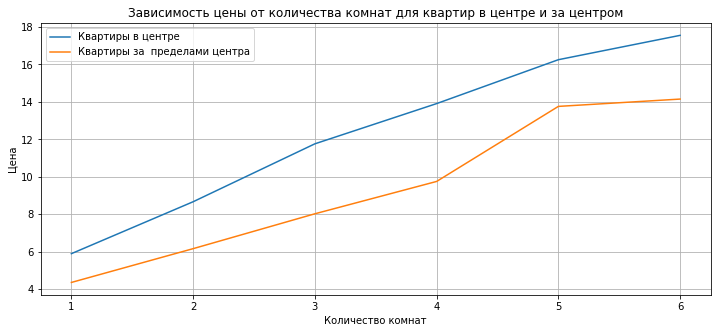

In [26]:
center_spb_round_price_per_rooms = center_spb.pivot_table(index ='rooms', values = 'last_price')
outside_the_city_spb_price_per_rooms= outside_the_city_spb.pivot_table(index ='rooms', values = 'last_price')

fig, ax = plt.subplots()
ax.plot(center_spb_round_price_per_rooms, label = 'Квартиры в центре')
ax.plot(outside_the_city_spb_price_per_rooms, label = 'Квартиры за  пределами центра')
ax.legend()
plt.title('Зависимость цены от количества комнат для квартир в центре и за центром')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
fig.set_figwidth(12)
fig.set_figheight(5)
plt.grid()
plt.show()

In [27]:
print('Коэффицент корреляции Пирсона в центре города равен {}'.
      format(round(center_spb['rooms'].corr(center_spb['last_price']),2)))
print('Коэффицент корреляции Пирсона за пределами центра города равен {}'.
      format(round(outside_the_city_spb['rooms'].corr(outside_the_city_spb['last_price']),2)))

Коэффицент корреляции Пирсона в центре города равен 0.45
Коэффицент корреляции Пирсона за пределами центра города равен 0.56


Исходяиз рассчета Коэфициентов Пирсона, как коичество комнат влияет на соимость квартиры, вино что за предеами центра города количество комнат влияет нацену сильнее чем в центре

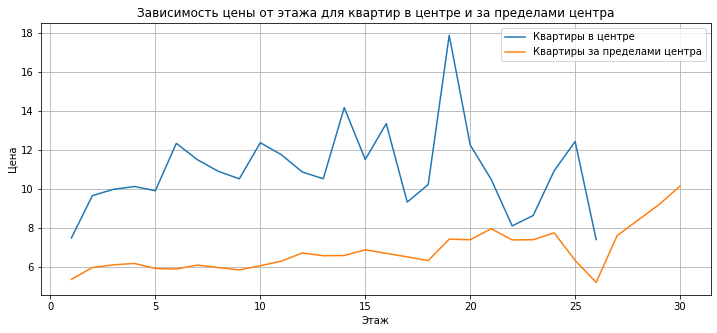

In [28]:
center_spb_price_per_floor = center_spb.pivot_table(index ='floor', values = 'last_price')
outside_the_city_spb_price_per_floor = outside_the_city_spb.pivot_table(index ='floor', values = 'last_price')

fig, ax = plt.subplots()
ax.plot(center_spb_price_per_floor, label = 'Квартиры в центре')
ax.plot(outside_the_city_spb_price_per_floor, label = 'Квартиры за пределами центра')
ax.legend()
plt.title('Зависимость цены от этажа для квартир в центре и за пределами центра')
plt.xlabel('Этаж')
plt.ylabel('Цена')
fig.set_figwidth(12)
fig.set_figheight(5)
plt.grid()
plt.show()

In [29]:
print('Коэффицент корреляции Пирсона в центре города равен {}'.
      format(round(center_spb['floor'].corr(center_spb['last_price']),2)))
print('Коэффицент корреляции Пирсона за пределами центра города равен {}'.
      format(round(outside_the_city_spb['floor'].corr(outside_the_city_spb['last_price']),2)))

Коэффицент корреляции Пирсона в центре города равен 0.14
Коэффицент корреляции Пирсона за пределами центра города равен 0.13


Полученные коэфициенты показывают, что зависимость этажом и стоимостью квартиры не большая

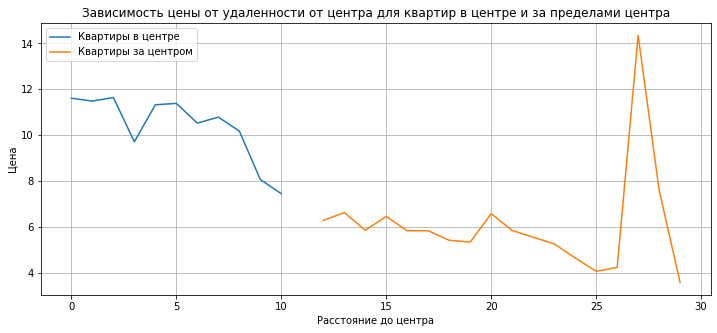

In [30]:
center_spb_distance_per_price = center_spb.pivot_table(index ='distance_to_center', values = 'last_price')
outside_the_city_spb_distance= outside_the_city_spb.pivot_table(index ='distance_to_center', values = 'last_price')

fig, ax = plt.subplots()
ax.plot(center_spb_distance_per_price, label = 'Квартиры в центре')
ax.plot(outside_the_city_spb_distance, label = 'Квартиры за центром')
ax.legend()
plt.title('Зависимость цены от удаленности от центра для квартир в центре и за пределами центра')
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена')
fig.set_figwidth(12)
fig.set_figheight(5)
plt.grid()
plt.show()

In [31]:
print('Коэффицент корреляции Пирсона в центре города равен {}'.
      format(round(center_spb['distance_to_center'].corr(center_spb['last_price']),2)))
print('Коэффицент корреляции Пирсона за пределами центра города равен {}'.
      format(round(outside_the_city_spb['distance_to_center'].corr(outside_the_city_spb['last_price']),2)))

Коэффицент корреляции Пирсона в центре города равен -0.18
Коэффицент корреляции Пирсона за пределами центра города равен -0.09


Коэфициент пирсона показывает что есть небольшая зависимость расстояния от центра  и цены. 

в Районе 27-28 км от центра виден резкий рост цены 

Это может быть вызвано либо стоимостью загородной недвижимости либо это выброс который не стоит учитывать в дальнейшем

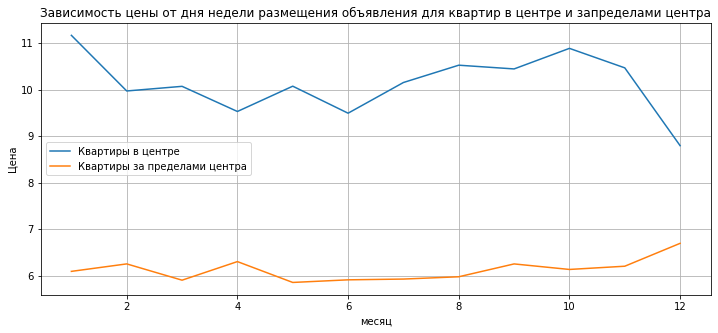

In [32]:
center_spb_date_per_price = center_spb.pivot_table(index ='month', values = 'last_price')
outside_the_city_spb_date_per_price = outside_the_city_spb.pivot_table(index ='month', values = 'last_price')

fig, ax = plt.subplots()
ax.plot(center_spb_date_per_price, label = 'Квартиры в центре')
ax.plot(outside_the_city_spb_date_per_price, label = 'Квартиры за пределами центра')
ax.legend()
plt.title('Зависимость цены от дня недели размещения объявления для квартир в центре и запределами центра')
plt.xlabel('месяц')
plt.ylabel('Цена')
fig.set_figwidth(12)
fig.set_figheight(5)
plt.grid()
plt.show()

In [34]:
print('Коэффицент корреляции Пирсона в центре города равен {}'.
      format(round(center_spb['month'].corr(center_spb['last_price']),2)))
print('Коэффицент корреляции Пирсона за пределами центра города равен {}'.
      format(round(outside_the_city_spb['month'].corr(outside_the_city_spb['last_price']),2)))

Коэффицент корреляции Пирсона в центре города равен -0.0
Коэффицент корреляции Пирсона за пределами центра города равен 0.02


Исходя из коэффициентов Пирсона можно сделать вывод, что в центре  месяц публикации не влияет на цену. 

За пределами центра так же видно что месяц публикации практически не влияет на цену.

<b>Вывод</b>

В целом можно заметить что между центорм Санкт-Петербурга и за пределами центра практически нет различий. Единственное что в центре города площадь и цена квартиры  немного выше.

из данных сводной таблицы видно что в центральной зоне высота потолков в среднем 3 м, цена от центра к краю центральной зоны незначително снижается. количество комнат в среднем 2-3, общая площадь также уменьшается ближе к краю центральной зоны.


## Общий вывод

При анализе датасета были изучены данные, выявлены и заполнены пропущенные знения, изменены типы данных для удобства дальнейшего анализа. Рассчитана цена квадратного метра квартиры,категорицировали этажность дома: первый, последний и другой этажи. Посчитано сооттношение жилой площди и площади кухни к общей площади.  изучил основные параметр квартиры и вывел  гистограммы для каждого параметра. Было выявлено что среднее время продажи составляет 164 дня, медионное время продажи - 77дней. Обычно квартира продается от 18 до 211 дней. Быстрыми продажами можно считать - до 30 дней,медленными - от 90 дней.        Исходя из ранее предпоогаемых значенийделаем срезы по площади, цене, комнатам и высоте потоков.
Соответственно предположил,что минимальная площадь студии не может быть меньше 21м2, так же максимально возможную площадь ограничили 250м2.
По цене срез делал изходя из того, чтосамая маленькая квартира не может стоить меньше 1,5млн руб, а максимальна цена - 40 млнруб.
в среднем по рынку квартиры не встречаются более 6 комнат. все остальное комуналки и они редко продаются целеком.
Предпологааю, то дома с потолками ниже 2,55м и 3,5м не строят.
Цена зависит от:
 - площади квартиры, чем квартира большей пощади тем дороже она стоит;
 - количества комнат, чем больше комнат тем дороже квартира;
 - от этажности  средние этажи стоят дороже.

Выбрали 10 городов с боьшим количеством объявлений, выявил населенные пункты с большей и меньшей стоимостью за м2: Санкт-Петербург и Всеволожск.
Выявил область центра - она составила 10 км. из данных сводной таблицы видно что в центральной зоне высота потолков в среднем 3 м, цена от центра к краю центральной зоны незначително снижается. количество комнат в среднем 2-3, общая площадь также уменьшается ближе к краю центральной зоны.

Исходя из проведенного анализа можно сделать следующие выводы:
 - чем дальше квартира от центра тем она дешевле. так же  и для квартир в центральном круге.
 - чем больше комнат тем выше стоимость квартиры
 - больше всего объявлений появляются в понедельник, вторник, среда и четверг
 - больше всего объявлений - в январе, а меньше - в июне
 - с 14 года по 18 - цены снижались и только с 18 года снова пошли в рост
 Было выбрано 10 населённых пунктов с наибольшим числом объявленийБ больше всего объявлений в Санкт-Петербурге. Самая высокая стоимость недвижимости - в деревне Бор, самая дешевая недвижимость - в поселке Пригорный и пгт Кузнечное.
 На графике  видно что в целом чем дальше квартира от центра тем дешевле она стоит
 Можно предположить что центральная зона - приблизительно 10 км
 из данных сводной таблицы видно что в центральной зоне высота потолков в среднем 3 м, цена от центра к краю центральной зоны незначително снижается. количество комнат в среднем 2-3, общая площадь также уменьшается ближе к краю центральной зоны.

По результату анализа можно сделать вывод, что цена квартиры зависит от: площади, высоты потолков, количества комнат и удаленности от центра.